## Machine Learning 
#### Iris dataset

In [9]:
from sklearn.datasets import load_iris
iris=load_iris()
type(iris)
# print (iris.data)
print(type(iris.data))
print(type(iris.target))
print (iris.feature_names)
#classification of the flower species 
print(iris.target_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [15]:
X=iris.data

y=iris.target

In [14]:
print(X.shape) 
print(y.shape)

(150, 4)
(150,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
#instanciation i.e hyperparametes adjustment
knn=KNeighborsClassifier(n_neighbors=1)
#print the model to see all the hyperparametes 
knn.fit(X,y)
list=[3,4,5,2]
a=np.array(list).reshape(1, -1)
print(knn.predict(a)) 
#2 is virginica 

[2]


In [25]:
x_new=[[3,5,4,2],[5,4,3,2]]
b=np.array(x_new)
print(knn.predict(b)) 

[2 1]


### Using Different value for K

In [26]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
print(knn.predict(x_new))

[1 1]


### Using Logistic regression to classify

In [30]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
lg.fit(X,y)
print(lg.predict(x_new))

[0 0]


In [32]:
y_pred=lg.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Training accuracy

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


In [36]:
knn_a=KNeighborsClassifier(n_neighbors=5)
knn_a.fit(X,y)
y_a=knn.predict(X)
print(metrics.accuracy_score(y,y_a))
knn_b=KNeighborsClassifier(n_neighbors=1)
knn_b.fit(X,y)
y_b=knn.predict(X)
print(metrics.accuracy_score(y,y_b))


0.9666666666666667
0.9666666666666667


### Train and Test split

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(90, 4) (90,) (60, 4) (60,)


In [42]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


### Tuning the hyperparameter

In [45]:
K_range=range(1,26)
scores=[]
for k in K_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'score')

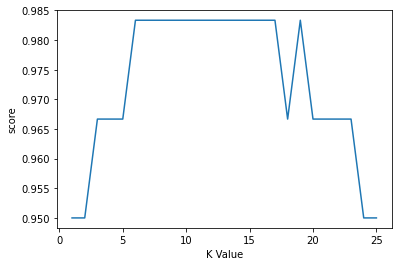

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(K_range,scores)
plt.xlabel("K Value")
plt.ylabel("score")
# plt.show()

###### Rise and fall of the test accuracy

In [50]:
knn=KNeighborsClassifier(n_neighbors=11) 
#train with entire X,y once tunning is done
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9833333333333333


###### train test split could lead to high varience 
###### as it depends on what observations are we choosing i.e random state 
###### to overcome this we have cross validation


## Using different libraries 

In [3]:
import pandas as pd 
data=pd.read_csv('/Users/apple/Desktop/Machine Learning/bpp_training_data.csv',index_col=0)
# print(data.head(5)) 
print(data.tail(5))
print(data.shape)

         SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
SalesID                                                                      
2192279    16500.0    1701366     6272         136            78      1000   
2192338    17000.0    1787662    12919         136            78      1000   
2433168    11500.0    1714162     9580         136            78      2005   
1586638    32000.0    1386512    11398         132            78      2005   
2396198    47500.0    1082033     2144         136            78      2005   

         MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
SalesID                                                                 ...   
2192279                        78          0         4215         1500  ...   
2192338                        78          0         4216         1501  ...   
2433168                        78          0         4514         1684  ...   
1586638                        78          3         1202 

In [4]:
df=pd.read_csv('/Users/apple/Desktop/Machine Learning/advertising.csv')
print(df.head(5)) 
print(df.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
(200, 4)


In [5]:
import seaborn as sns  
#to allow plots to be show within the notebook 
%matplotlib inline 

In [6]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


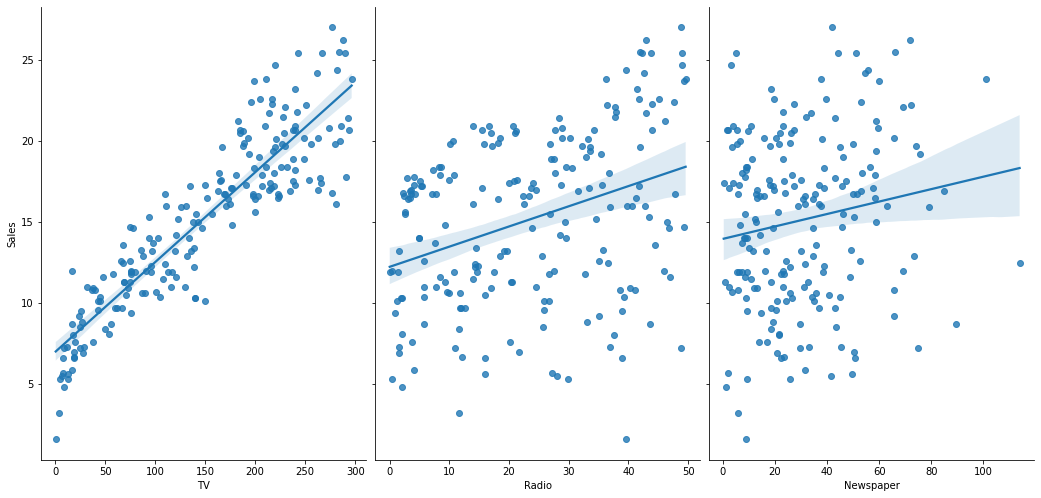

In [7]:
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind='reg') 
# pairwise ploting of each feature with y 
print(df.columns)

In [74]:
Features=['TV', 'Radio', 'Newspaper']
X=df[Features]
print(X.shape) 

(200, 3)


In [77]:
y=df['Sales']
y.head(2) 
y.shape

(200,)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4)
#default split size is 0.25 
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
# zip(Features,lg.coef_) 




In [93]:
print(metrics.mean_absolute_error(y_test,y_pred)) 
y_over=lg.predict(X_train)
print(metrics.mean_absolute_error(y_train,y_over)) 
#checking if the model overfit or not 

1.0832160913404183
1.2945714969063682


In [88]:
print(lg.coef_) 

[0.05483762 0.10218027 0.00078783]


### Feature Selection
#### Removing the newspaper feature since it has a weak correlation

In [96]:
Features=['TV', 'Radio']
X=df[Features]   
print(X.shape)
y=df['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4)
#default split size is 0.25 
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test) 
print(metrics.mean_absolute_error(y_test,y_pred)) 

(200, 2)
1.0832160913404183


### Cross validation 
#### helps in getting a more accurate representation of the data set 

In [105]:
from sklearn.model_selection import cross_val_score 
knn=KNeighborsClassifier(n_neighbors=5) 
from sklearn.datasets import load_iris 
X=iris.data
y=iris.target
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)  
print("The mean of all the 10 folds is-:",scores.mean())
# print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
The mean of all the 10 folds is-: 0.9666666666666668


#### Searching for optimal K value in KNN using cross validation

In [106]:
K_range=range(1,31)
k_scores=[]

for k in K_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross Validation accuracy')

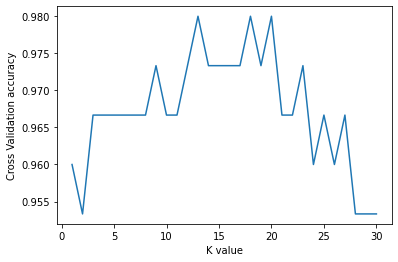

In [107]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(K_range,k_scores) 
plt.xlabel("K value") 
plt.ylabel("Cross Validation accuracy")

###### from the above graph we can conclude that k=20 gives us the best accuracy 

### Cross validation for feature selection

In [109]:
df=pd.read_csv('/Users/apple/Desktop/Machine Learning/advertising.csv')
Features=['TV', 'Radio', 'Newspaper']
X=df[Features]
y=df.Sales 

lm=LinearRegression() 
print(np.sqrt(-cross_val_score(lm,X,y,scoring='neg_mean_squared_error')).mean())

1.6657702460059212


In [111]:
F=['TV','Radio'] 
X=df[F]
y=df.Sales 

lm=LinearRegression() 
print(np.sqrt(-cross_val_score(lm,X,y,scoring='neg_mean_squared_error')).mean())

1.6617240826962008


#### Lower mean square error => remove the Newspaper Feature 

#### Optimal tunnning parameters

Text(0, 0.5, 'Cross validation accuracy')

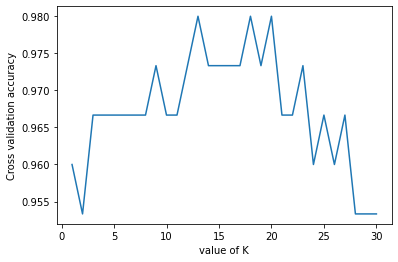

In [12]:
from sklearn.model_selection import GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_iris
iris=load_iris()

knn=KNeighborsClassifier() 
X=iris.data
y=iris.target 
K_range=range(1,31)  
param_grid=dict(n_neighbors=K_range)

#grid search 
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')  
grid.fit(X,y)

grid_mean_scores = grid.cv_results_['mean_test_score']

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(K_range,grid_mean_scores)
plt.xlabel("value of K")
plt.ylabel("Cross validation accuracy")

In [13]:
#getting the best estimator 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


#### Searching multiple parameters at once 

In [15]:
k_range = list(range(1, 31)) 
#weights to be uniform or based on distance 
weight_options = ['uniform', 'distance'] 

param_grid = dict(n_neighbors=k_range, weights=weight_options) 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y) 

#the best values are -: 
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


In [16]:
from sklearn.model_selection import RandomizedSearchCV 
param_dist = dict(n_neighbors=k_range, weights=weight_options)
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)

#finding the best value 
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}


#### Even with just 10 iterations its giving an accuracy equal to grid search 

## Model Evaluation

#### Evaluation of classification models 

In [10]:
import pandas as pd 

df=pd.read_csv("/Users/apple/Desktop/Machine Learning/diabetes.csv") 
print(df.columns) 
print(df.head(5))

#1 if diabetic 
#0 if not diabetic 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### Prediction only using health measurements 

In [11]:
Features=['Pregnancies','Insulin','BMI','Age'] 
X=df[Features] 
y=df.Outcome

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [12]:
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression() 
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test) 

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.6770833333333334


##### null accuracy 

In [25]:
print(y_test.value_counts())

0    130
1     62
Name: Outcome, dtype: int64


##### the most frequent class here is 0 


In [26]:
# calculate the percentage of ones
print(y_test.mean())
# calculate the percentage of zeros
print(1 - y_test.mean())


0.3229166666666667
0.6770833333333333


In [27]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

In [29]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


###### It predicts zero correctly but not the ones correctly but why ? 
###### This cant be understood through accuracy

##### Accurancy cant tell us what is the underlying distribution of the test set 

##### Accuracy doesnt specify on what kind/type of error are we making 

### Confusion Matrix 

In [32]:
print(metrics.confusion_matrix(y_test, y_pred))

[[114  16]
 [ 46  16]]


In [34]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### The Four metrics we get from confusion matrix 

#### a) Recall/Sensitivity-:how sensitive is the model to predict 1 when its actually 1 

In [36]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.25806451612903225
0.25806451612903225


#### b) Specivicity-: how sensitive is the model to predict 0 when its actually 0

In [37]:
print(TN / (TN + FP))

0.8769230769230769


#### c)False postive-: 1-specivity

In [38]:
print(FP / (TN + FP))

0.12307692307692308


#### d)Precision-: how properly does it work with the positives

In [40]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.5
0.5


In [41]:
# Which metrics should you focus on?

# Choice of metric depends on your business objective
# Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
# Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

#### Adjusting the threshold for classification 
##### Last resort 

In [13]:
lg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [14]:
y_pred_prob = lg.predict_proba(X_test)[:, 1]

In [15]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

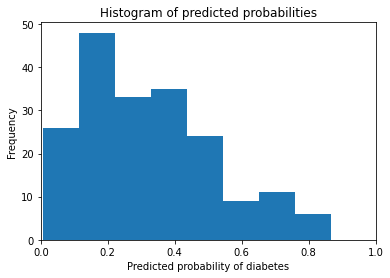

In [16]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [17]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [18]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [19]:
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

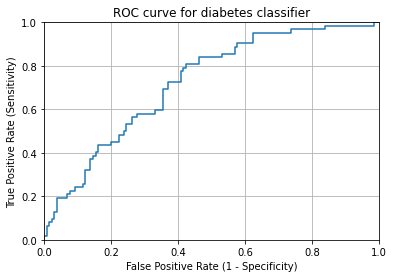

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [21]:

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(lg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

#### M.L pipeline